<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/DL_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

In [45]:
data_train = pd.read_csv('./train (1).csv')
data_test = pd.read_csv('./test (1).csv')

In [24]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,413,Yes,Upper,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Queenstown
1,92,No,Lower,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,Southampton
2,724,No,Middle,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,Southampton
3,312,Yes,Upper,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,Cherbourg
4,723,No,Middle,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,Southampton


In [25]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [26]:
data_train.shape

(711, 12)

In [46]:
data_train.describe() #solo coge las num

,PassengerId,Age,SibSp,Parch,Fare
count,711.000000,573.000000,711.000000,711.000000,711.000000
mean,448.981716,28.845986,0.542897,0.393812,31.973669
std,257.156506,14.282324,1.112314,0.821998,50.468437
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.000000,19.000000,0.000000,0.000000,7.925000
50%,458.000000,28.000000,0.000000,0.000000,14.458300
75%,675.500000,36.500000,1.000000,0.000000,30.847900
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         0
dtype: int64

In [29]:
data_test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             39
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
dtype: int64

In [30]:
data_train.select_dtypes(include='object').describe() #saco solo las categóricas

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,711,711,711,711,711,158,711
unique,2,3,711,2,568,122,3
top,No,Lower,"Peters, Miss. Katie",male,347082,G6,Southampton
freq,438,391,1,464,6,4,518


**Missing Values**

In [10]:
print('Missing in training data:\n', data_train.isnull().sum())
print('Missing in test data: \n', data_test.isnull().sum())

Missing in training data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         0
dtype: int64
Missing in test data: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             39
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
dtype: int64


**PassengerId y Name**

In [31]:
print(data_train.PassengerId.isnull().sum(axis=0))
print(data_test.PassengerId.isnull().sum(axis=0))

print(data_train.Name.isnull().sum(axis=0))
print(data_test.Name.isnull().sum(axis=0))

0
0
0
0


**Pclass** Convertir de str a numérico

In [32]:
print(data_train.Pclass.isnull().sum(axis=0))
print(data_test.Pclass.isnull().sum(axis=0))

0
0


In [33]:
data_train.Pclass

0       Upper
1       Lower
2      Middle
3       Upper
4      Middle
        ...  
706     Upper
707     Lower
708    Middle
709     Upper
710     Lower
Name: Pclass, Length: 711, dtype: object

In [34]:
data_train.Pclass = data_train.Pclass.map({'Lower':3, 'Middle':2, 'Upper': 1})
data_test.Pclass = data_test.Pclass.map({'Lower':3, 'Middle':2, 'Upper': 1})

#puedo hacer one hot 

**Sexo** Convertir de str a numérico

In [35]:
# check if there is any NAN
data_train.Sex.isnull().sum(axis=0)
data_test.Sex.isnull().sum(axis=0)

0

In [36]:
data_train.Sex = data_train.Sex.map({'male':0, 'female':1})
data_test.Sex = data_test.Sex.map({'male':0, 'female':1})

**Survived** Convertir de str a numérico

In [37]:
data_train.Survived.isna().sum()

0

In [38]:
data_train.Survived = data_train.Survived.map({'No' : 0, 'Yes' :1})
data_test.Survived = data_test.Survived.map({'No' : 0, 'Yes' :1})

**Age**

In [39]:
print(data_train.Age.isna().sum())
print(data_test.Age.isna().sum())

138
39


Tengo 138 valores perdidos, debo decidir si eliminar o mantener, sacar la media, etc. Imputo la mediana, por ejemplo:



In [47]:
#imputo nan:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].median())
data_test['Age'] = data_test['Age'].fillna(data_train['Age'].median())

In [48]:
data_test['Age']

0      28.0
1      28.0
2      62.0
3      28.0
4      58.0
       ... 
174    28.0
175    32.0
176    19.0
177    42.0
178    28.0
Name: Age, Length: 179, dtype: float64

In [49]:
# Binning the Age and the Fare
data_train['Age'] = pd.cut(data_train['Age'], 5)
data_test['Age'] = pd.cut(data_test['Age'], bins=data_train['Age'].dtype.categories)
data_train['Fare'] = pd.qcut(data_train['Fare'], 5)
data_test['Fare'] = pd.cut(data_test['Fare'], bins=data_train['Fare'].dtype.categories)

In [58]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,413,Yes,Upper,"Minahan, Miss. Daisy E",female,"(32.252, 48.168]",1,0,19928,"(39.688, 512.329]",C78,Queenstown,ABC
1,92,No,Lower,"Andreasson, Mr. Paul Edvin",male,"(16.336, 32.252]",0,0,347466,"(-0.001, 7.896]",NaN,Southampton,M
2,724,No,Middle,"Hodges, Mr. Henry Price",male,"(48.168, 64.084]",0,0,250643,"(10.5, 21.075]",NaN,Southampton,M
3,312,Yes,Upper,"Ryerson, Miss. Emily Borie",female,"(16.336, 32.252]",2,2,PC 17608,"(39.688, 512.329]",B57 B59 B63 B66,Cherbourg,ABC
4,723,No,Middle,"Gillespie, Mr. William Henry",male,"(32.252, 48.168]",0,0,12233,"(10.5, 21.075]",NaN,Southampton,M
5,871,No,Lower,"Balkic, Mr. Cerin",male,"(16.336, 32.252]",0,0,349248,"(-0.001, 7.896]",NaN,Southampton,M
6,50,No,Lower,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,"(16.336, 32.252]",1,0,349237,"(10.5, 21.075]",NaN,Southampton,M
7,856,Yes,Lower,"Aks, Mrs. Sam (Leah Rosen)",female,"(16.336, 32.252]",0,1,392091,"(7.896, 10.5]",NaN,Southampton,M
8,581,Yes,Middle,"Christy, Miss. Julie Rachel",female,"(16.336, 32.252]",1,1,237789,"(21.075, 39.688]",NaN,Southampton,M
9,567,No,Lower,"Stoytcheff, Mr. Ilia",male,"(16.336, 32.252]",0,0,349205,"(-0.001, 7.896]",NaN,Southampton,M


In [51]:
# Convert cabin to categorical
data_train['Deck'] = data_train['Cabin'].str[0] #copio 
data_train['Deck'] = data_train['Deck'].fillna('M') #cambio nan por M
data_test['Deck'] = data_test['Cabin'].str[0]
data_test['Deck'] = data_test['Deck'].fillna('M')
# print(data_tr['Deck'].value_counts())

In [52]:
# Group Decks
data_train['Deck'] = data_train['Deck'].replace(['A', 'B', 'C'], 'ABC')
data_train['Deck'] = data_train['Deck'].replace(['D', 'E'], 'DE')
data_train['Deck'] = data_train['Deck'].replace(['F', 'G'], 'FG')
data_test['Deck'] = data_test['Deck'].replace(['A', 'B', 'C'], 'ABC')
data_test['Deck'] = data_test['Deck'].replace(['D', 'E'], 'DE')
data_test['Deck'] = data_test['Deck'].replace(['F', 'G'], 'FG')
# print(data_tr['Deck'].value_counts())

In [50]:
data_train['Age']

0      (32.252, 48.168]
1      (16.336, 32.252]
2      (48.168, 64.084]
3      (16.336, 32.252]
4      (32.252, 48.168]
             ...       
706    (48.168, 64.084]
707    (16.336, 32.252]
708    (16.336, 32.252]
709      (64.084, 80.0]
710    (16.336, 32.252]
Name: Age, Length: 711, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] <
                                    (48.168, 64.084] < (64.084, 80.0]]

**Title**

In [59]:
# Create new column Title
data_train['Title'] = data_train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
data_train['Title'] = data_train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
idx = data_train['Title'].value_counts() > 10
title_names = idx[idx].index.to_list()
data_train['Title'] = data_train['Title'].apply(lambda x: x if x in title_names else 'Other')
data_train['Title'] = data_train['Title'].apply(lambda x: x if x in title_names else 'Other')

**SibSp**

In [ ]:
print(data_train.SibSp.isna().sum())
print(data_test.SibSp.isna().sum())

0
0


In [ ]:
data_train.SibSp #son numéricos, no hace falta transformar

0      1
1      0
2      0
3      2
4      0
      ..
706    0
707    0
708    0
709    1
710    0
Name: SibSp, Length: 711, dtype: int64

**Parch**

In [ ]:
print(data_train.Parch.isna().sum())
print(data_test.Parch.isna().sum())

0
0


In [ ]:
data_test.Parch

0      0
1      0
2      0
3      0
4      0
      ..
174    0
175    0
176    0
177    0
178    0
Name: Parch, Length: 179, dtype: int64

In [ ]:
data_train.Parch

0      0
1      0
2      0
3      2
4      0
      ..
706    0
707    0
708    0
709    1
710    0
Name: Parch, Length: 711, dtype: int64

**Ticket**

In [ ]:
print(data_train.Ticket.isna().sum())
print(data_test.Ticket.isna().sum())

0
0


No es un dato relevante, se puede eliminar.

**Fare**

In [ ]:
print(data_train.Fare.isna().sum())
print(data_test.Fare.isna().sum())

0
0


No lo veo un dato relevante

**Cabin**

In [ ]:
print(data_train.Cabin.isna().sum())
print(data_test.Cabin.isna().sum())

553
134


In [ ]:
data_train.Cabin.unique()

array(['C78', nan, 'B57 B59 B63 B66', 'E68', 'C7', 'E101', 'E24', 'B19',
       'G6', 'E34', 'C52', 'E67', 'D26', 'C23 C25 C27', 'B78', 'B4',
       'C118', 'C82', 'D30', 'E12', 'D17', 'C62 C64', 'D', 'E33', 'C92',
       'E121', 'C30', 'C65', 'B77', 'B5', 'C22 C26', 'B28', 'B42', 'D33',
       'D9', 'D46', 'E36', 'B96 B98', 'C126', 'B51 B53 B55', 'B49', 'B71',
       'D20', 'C46', 'C101', 'C99', 'F E69', 'C128', 'C85', 'B20', 'C90',
       'A6', 'D10 D12', 'C93', 'E25', 'D11', 'D21', 'F38', 'B39', 'E77',
       'B38', 'C32', 'E44', 'C83', 'C125', 'D7', 'E63', 'B35', 'C54',
       'F2', 'E46', 'B102', 'B50', 'A23', 'C86', 'F33', 'D50', 'B18',
       'A32', 'C123', 'C124', 'F4', 'A16', 'C68', 'C91', 'E8', 'B79',
       'B22', 'E58', 'D35', 'C148', 'A34', 'E10', 'F G63', 'B41', 'B86',
       'D19', 'C106', 'E50', 'A26', 'B30', 'D36', 'C2', 'C50', 'B101',
       'C110', 'C111', 'A10', 'F G73', 'A36', 'D45', 'C70', 'B58 B60',
       'B82 B84', 'D48', 'E38', 'A19', 'D37', 'A14', 'D15', 'D49

In [ ]:
data_test['']

tenemos tanto valores perdidos que nos la deberíamos quitar

**Embarked**

In [ ]:
print(data_train.Embarked.isna().sum())
print(data_test.Embarked.isna().sum())
print(data_train.Embarked.isnull().sum(axis=0))

0
0
0


In [ ]:
data_train.Embarked.unique()

array(['Queenstown', 'Southampton', 'Cherbourg'], dtype=object)

In [ ]:
data_test.Embarked.unique()

array(['Cherbourg', 'Southampton', 'Queenstown'], dtype=object)

In [ ]:
#d = pd.get_dummies(data_train.Embarked)
#d
#e = pd.get_dummies(data_test.Embarked)
#data_train.Embarked

data_train.Embarked = d
data_test.Embarked = e
data_test.Embarked

0      1
1      1
2      0
3      0
4      0
      ..
174    0
175    0
176    0
177    0
178    0
Name: Embarked, Length: 179, dtype: uint8

In [ ]:
data_train.Embarked = data_train.Embarked.map({'Queenstown' : 1, 'Southampton' : 2, 'Cherbourg' : 3})
data_test.Embarked = data_test.Embarked.map({'Queenstown' : 1, 'Southampton' : 2, 'Cherbourg' : 3})

In [ ]:
dt_train = data_train
dt_test = data_test

dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,413,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.0000,C78,0
1,92,0,3,"Andreasson, Mr. Paul Edvin",0,20.0,0,0,347466,7.8542,NaN,0
2,724,0,2,"Hodges, Mr. Henry Price",0,50.0,0,0,250643,13.0000,NaN,0
3,312,1,1,"Ryerson, Miss. Emily Borie",1,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,1
4,723,0,2,"Gillespie, Mr. William Henry",0,34.0,0,0,12233,13.0000,NaN,0


In [ ]:
dt_train = dt_train.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1)

dt_test = dt_test.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1)

In [ ]:
dt_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,33.0,1,0,90.0000,1
1,0,3,0,20.0,0,0,7.8542,1
2,0,2,0,50.0,0,0,13.0000,1
3,1,1,1,18.0,2,2,262.3750,0
4,0,2,0,34.0,0,0,13.0000,1


In [ ]:
X_train = pd.concat([dt_train, d], axis=1)
X_train = X_train.drop(['Name', 'Cabin', 'Ticket', 'PassengerId','Embarked'], axis=1)
X_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,1,1,1,33.0,1,0,90.0000,0,1,0
1,0,3,0,20.0,0,0,7.8542,0,0,1
2,0,2,0,50.0,0,0,13.0000,0,0,1
3,1,1,1,18.0,2,2,262.3750,1,0,0
4,0,2,0,34.0,0,0,13.0000,0,0,1
...,...,...,...,...,...,...,...,...,...,...
706,0,1,0,64.0,0,0,26.0000,0,0,1
707,0,3,0,29.0,0,0,9.4833,0,0,1
708,0,2,0,19.0,0,0,10.5000,0,0,1
709,0,1,0,70.0,1,1,71.0000,0,0,1


In [ ]:
X_test = pd.concat([dt_test, e], axis=1)
X_test = X_test.drop(['Name', 'Cabin', 'Ticket', 'PassengerId', 'Embarked'], axis=1)
X_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,1,1,0,28.0,0,0,29.7000,1,0,0
1,0,3,1,28.0,1,0,14.4583,1,0,0
2,0,1,0,62.0,0,0,26.5500,0,0,1
3,0,3,0,28.0,0,0,7.0500,0,0,1
4,1,1,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
174,1,3,1,28.0,2,0,23.2500,0,1,0
175,0,3,0,32.0,0,0,7.9250,0,0,1
176,0,3,0,19.0,0,0,10.1708,0,0,1
177,0,3,0,42.0,0,0,8.6625,0,0,1


In [ ]:
#embarked está mal

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scl = MinMaxScaler()
X_transformed = min_max_scl.fit_transform(X_test)
X_transformed_df = pd.DataFrame(X_transformed, columns=X_test.columns)
X_transformed_df_test=X_transformed_df

In [ ]:
min_max_scl = MinMaxScaler()
X_transformed = min_max_scl.fit_transform(X_train)
X_transformed_df = pd.DataFrame(X_transformed, columns=X_train.columns)
X_transformed_df_train=X_transformed_df

In [ ]:
X_transformed_df_test_ = X_transformed_df_test.iloc[:, 1:]
y_transformed_df_test = X_transformed_df_test.iloc[:, 0]
y_transformed_df_test

X_transformed_df_train_ = X_transformed_df_train.iloc[:, 1:]
y_transformed_df_train = X_transformed_df_train.iloc[:, 0]
X_transformed_df_train_

,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,0.0,1.0,0.409399,0.125,0.000000,0.175668,0.0,1.0,0.0
1,1.0,0.0,0.246042,0.000,0.000000,0.015330,0.0,0.0,1.0
2,0.5,0.0,0.623021,0.000,0.000000,0.025374,0.0,0.0,1.0
3,0.0,1.0,0.220910,0.250,0.333333,0.512122,1.0,0.0,0.0
4,0.5,0.0,0.421965,0.000,0.000000,0.025374,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
706,0.0,0.0,0.798944,0.000,0.000000,0.050749,0.0,0.0,1.0
707,1.0,0.0,0.359135,0.000,0.000000,0.018510,0.0,0.0,1.0
708,0.5,0.0,0.233476,0.000,0.000000,0.020495,0.0,0.0,1.0
709,0.0,0.0,0.874340,0.125,0.166667,0.138583,0.0,0.0,1.0


In [ ]:
from tensorflow.keras.layers import Dense, Input, Lambda

In [ ]:
n_epochs = 500  #
batch_size = 128
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002) #enntrena muy despacio
#el flatten es para convertir imagen a vector, ahora ya tenemos un vector de entrada
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dropout(0.2, input_shape=(X_transformed_df_train_.shape[1],)))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#problema clasificacion con una única neurona, sigmoide

# Entrenamiento #auc área bajo la curva
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["AUC"]) 


In [ ]:
hist= model.fit(X_transformed_df_train_, 
                      y_transformed_df_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      shuffle=True,
                      validation_split=.2)

Epoch 1/500
5/5 [==============================] - 2s 85ms/step - loss: 0.8387 - auc: 0.4019 - val_loss: 0.8315 - val_auc: 0.4172
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 0.8025 - auc: 0.4535 - val_loss: 0.8153 - val_auc: 0.4248
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7953 - auc: 0.4666 - val_loss: 0.8001 - val_auc: 0.4223
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7802 - auc: 0.4670 - val_loss: 0.7861 - val_auc: 0.4274
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7746 - auc: 0.4666 - val_loss: 0.7733 - val_auc: 0.4354
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7655 - auc: 0.4344 - val_loss: 0.7616 - val_auc: 0.4519
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7563 - auc: 0.4548 - val_loss: 0.7509 - val_auc: 0.4630
Epoch 8/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7469 - auc: 0.4852 

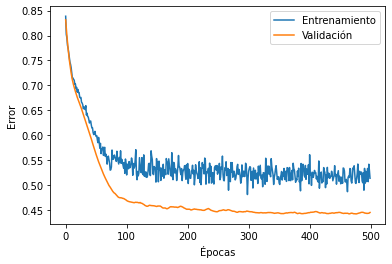

In [ ]:
plt.figure()
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Entrenamiento', 'Validación']);

In [ ]:
y_pred = encoder.predict(X_transformed_df_test_)
accuracy_score(Y, y_pred)